In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [2]:
# Load data
df = pd.read_csv('cloudpredictionsystemproject.csv')

In [3]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
# Encode categorical variables
le = LabelEncoder()
label_encode_columns = ['WindGustDirection', 'WindDirection9am', 'WindDirection3pm', 'CloudBurst Today', 'CloudBurstTomorrow']
for col in label_encode_columns:
    df[col] = le.fit_transform(df[col])

In [5]:
# One-hot encode 'Location' column
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [6]:
# Handle missing values
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [7]:
# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['MinimumTemperature', 'MaximumTemperature', 'Rainfall', 'Evaporation', 
                      'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 
                      'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 
                      'Temperature9am', 'Temperature3pm']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

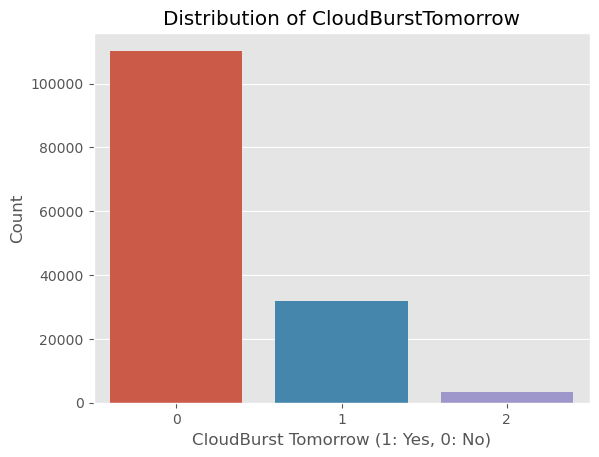

In [8]:
# EDA
plt.style.use('ggplot')
sns.countplot(x='CloudBurstTomorrow', data=df)
plt.title('Distribution of CloudBurstTomorrow')
plt.xlabel('CloudBurst Tomorrow (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

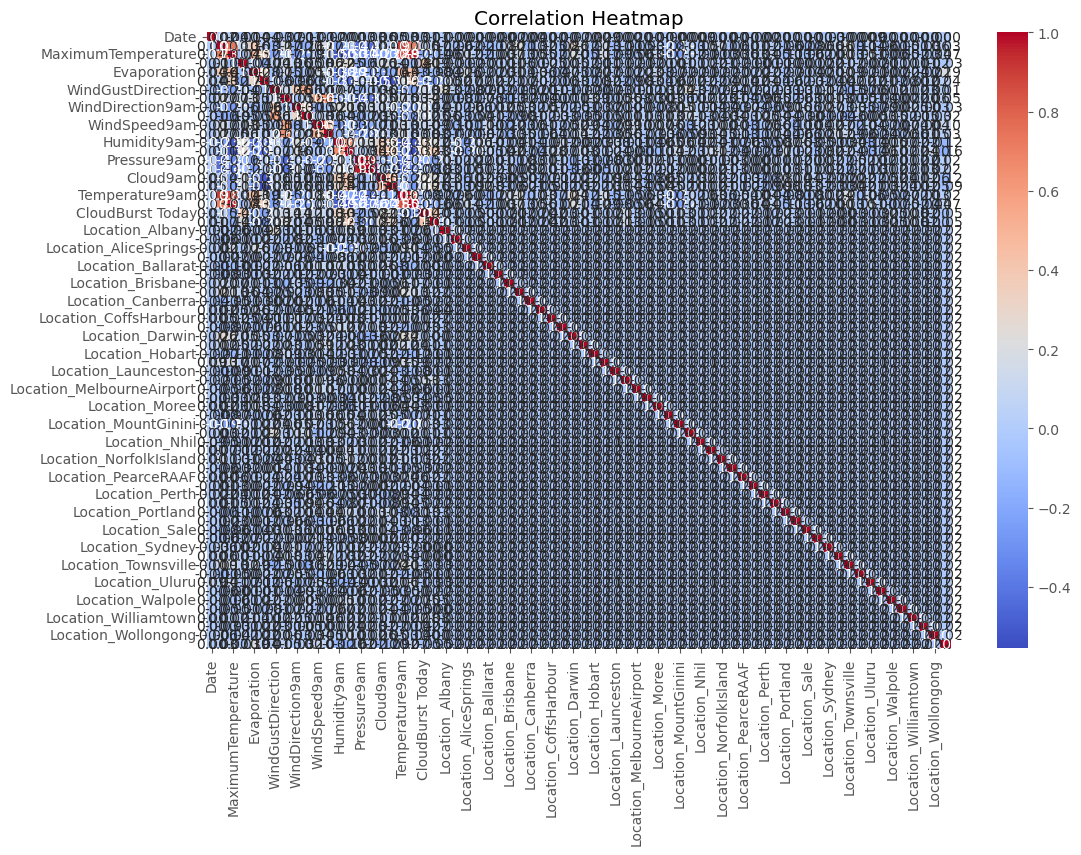

In [9]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

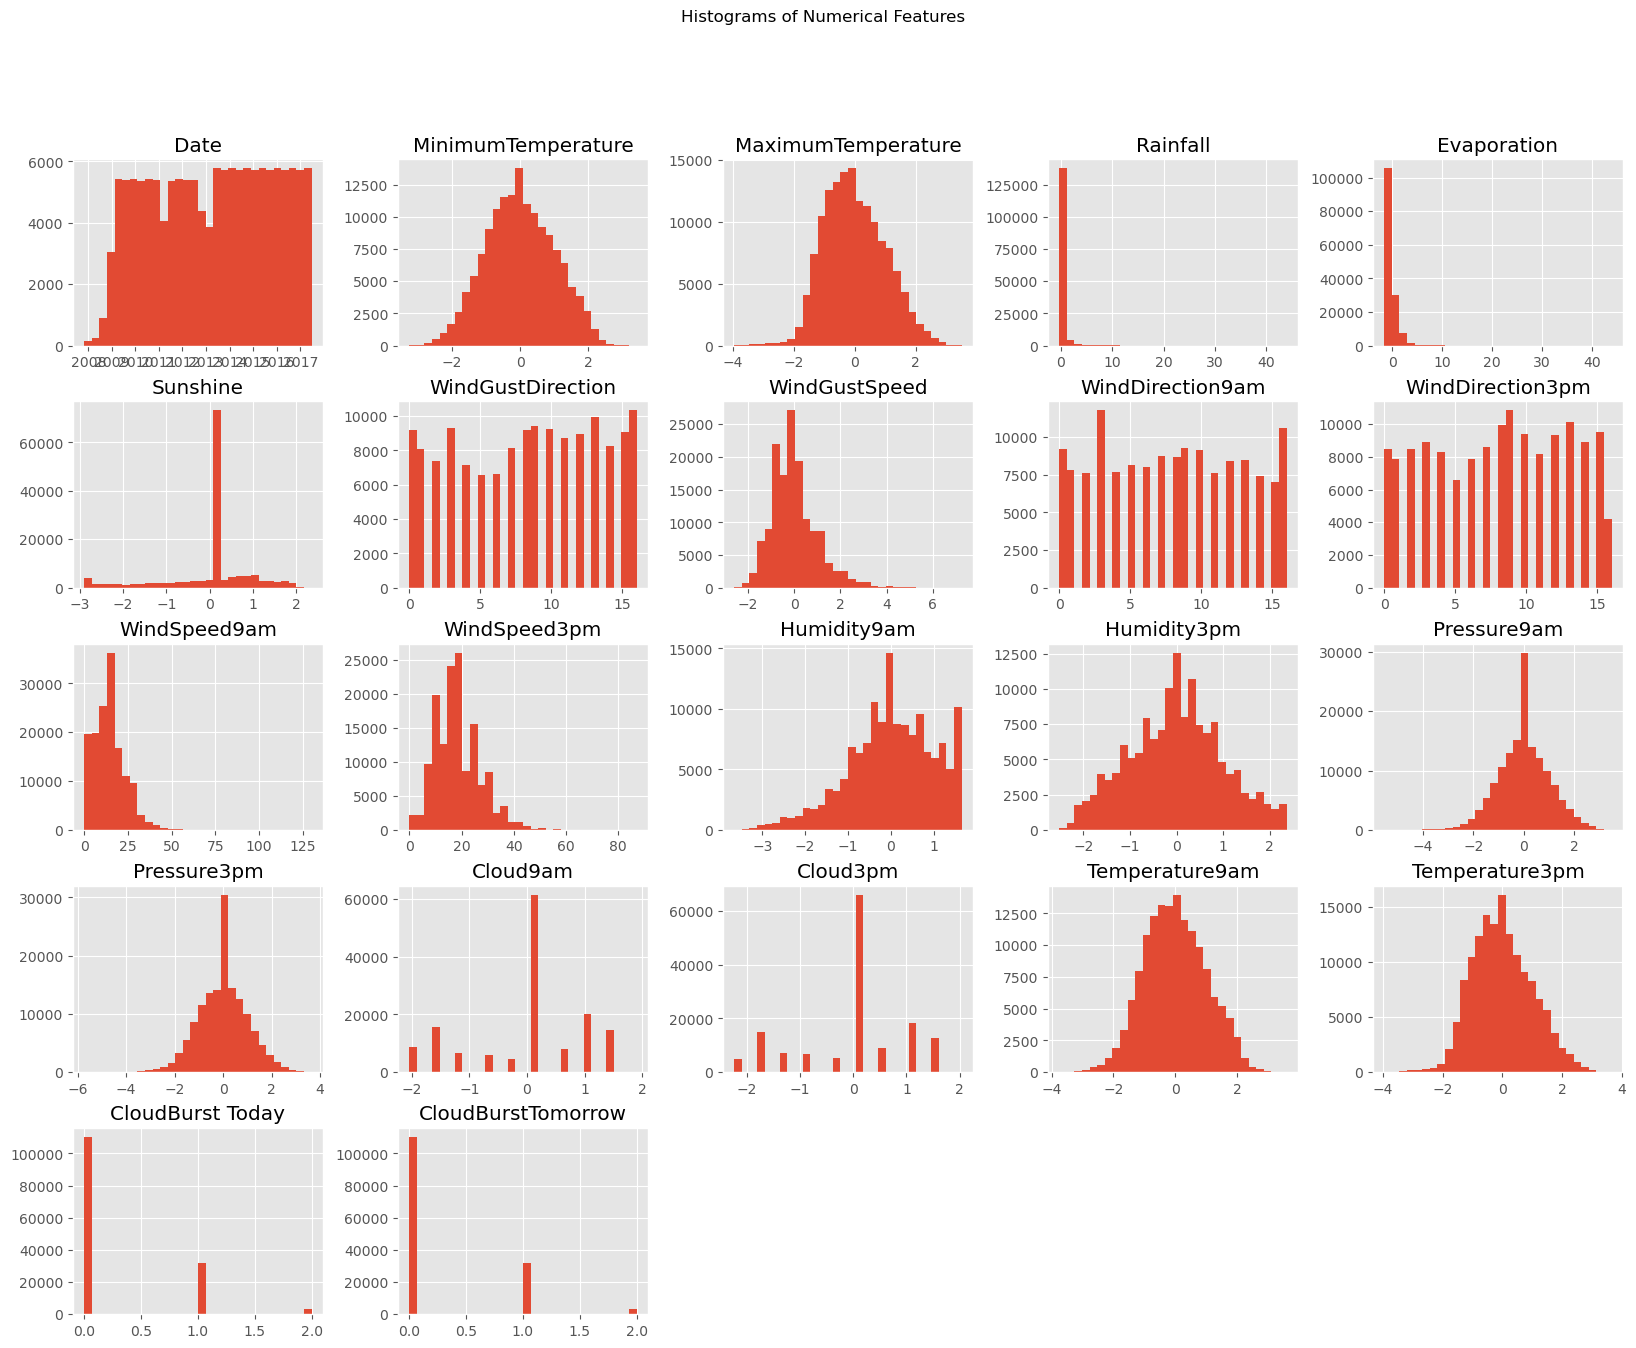

In [10]:
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

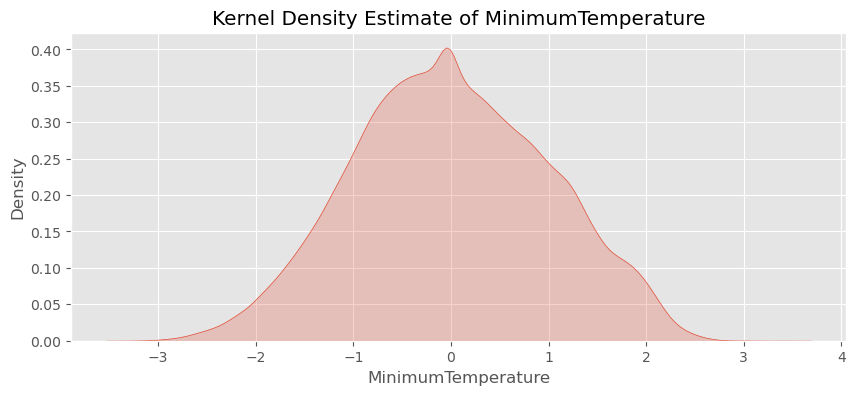

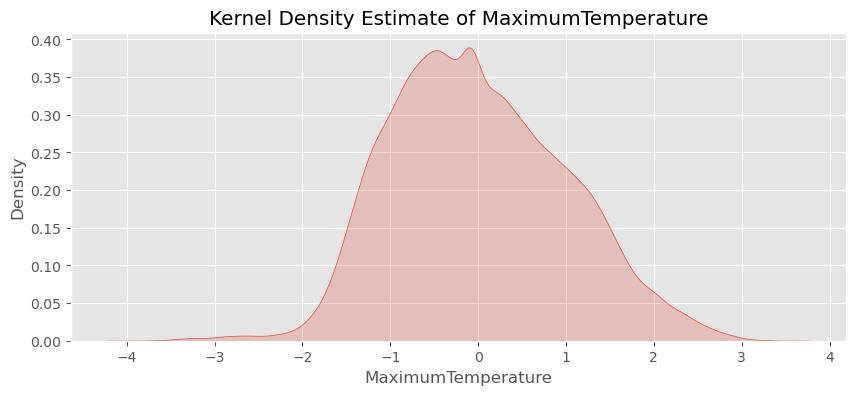

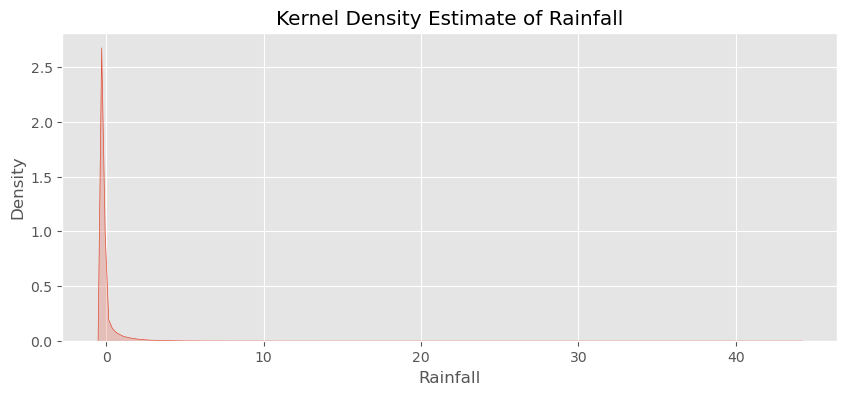

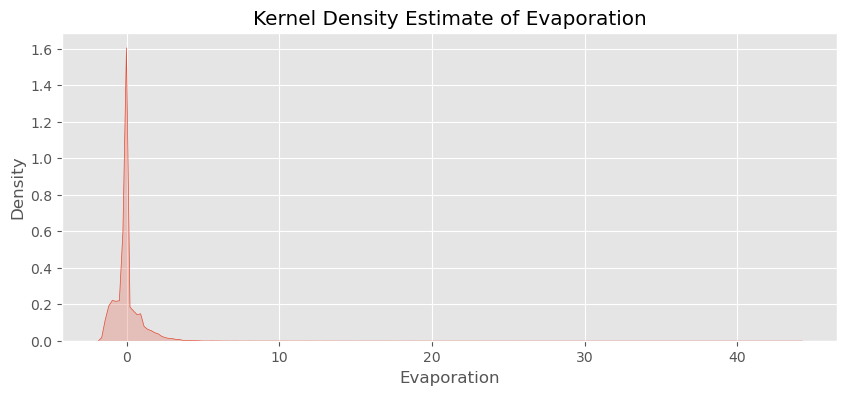

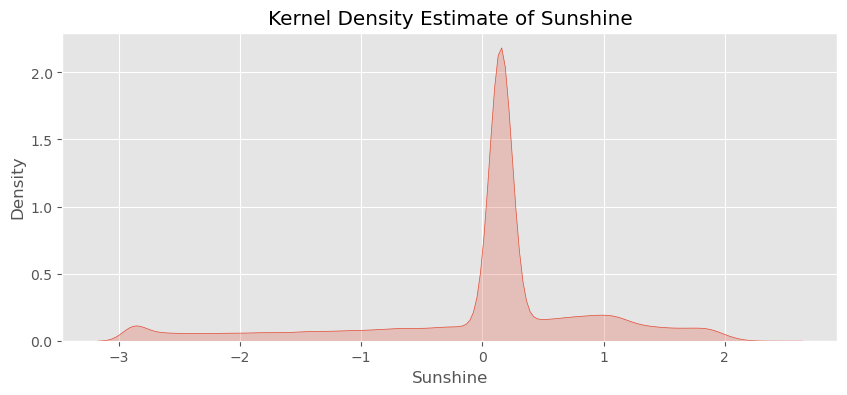

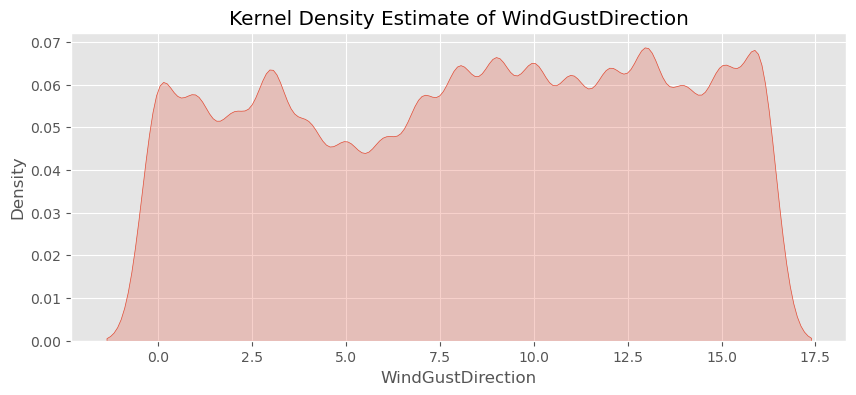

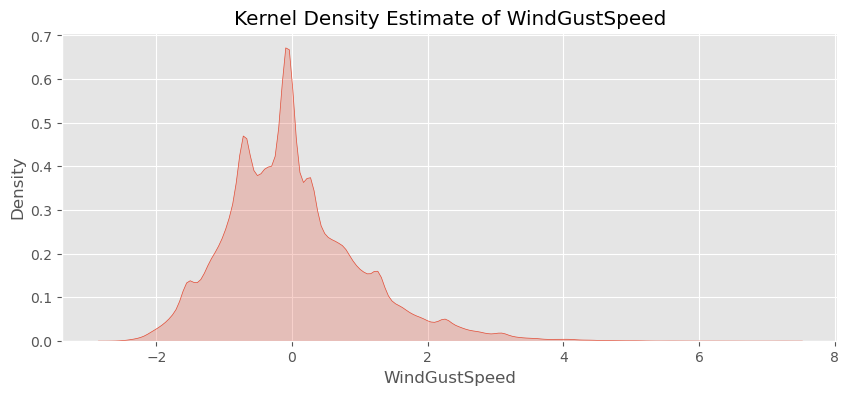

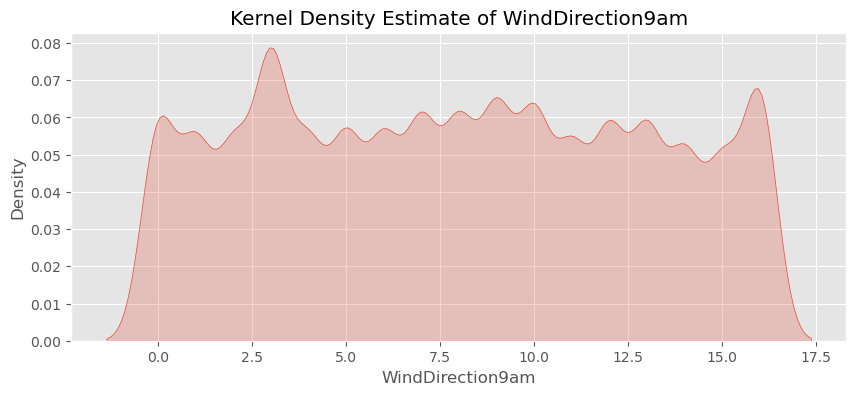

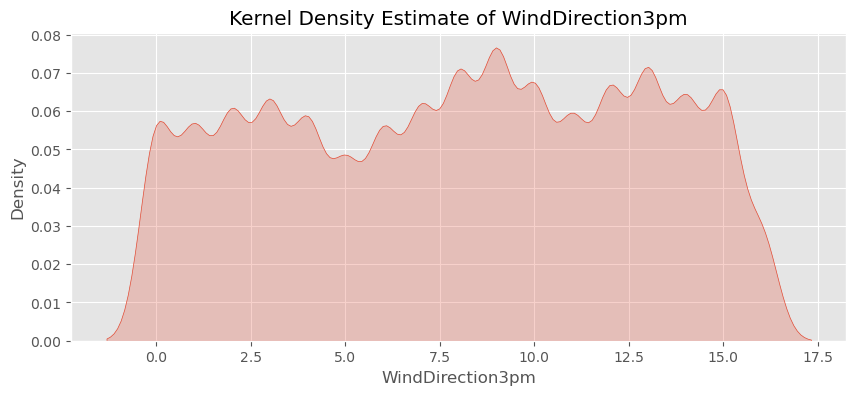

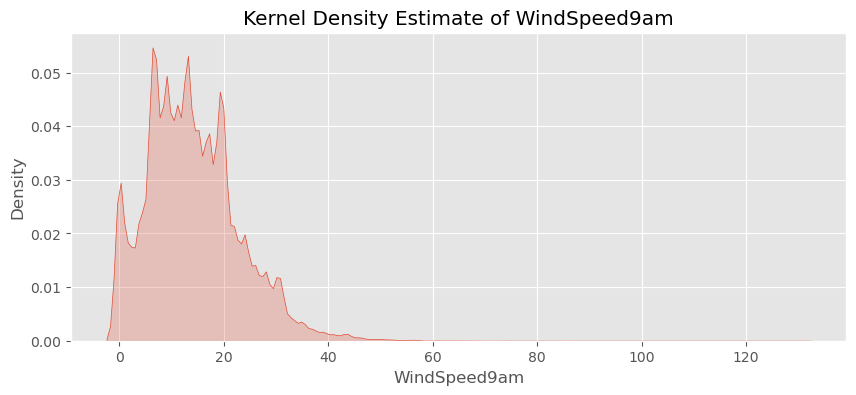

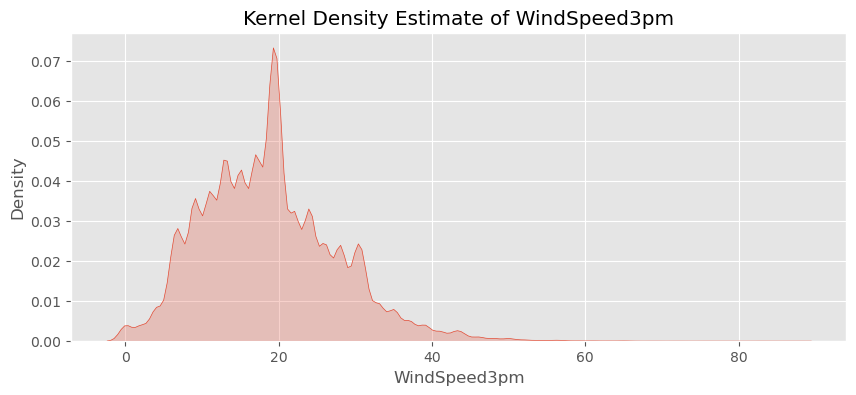

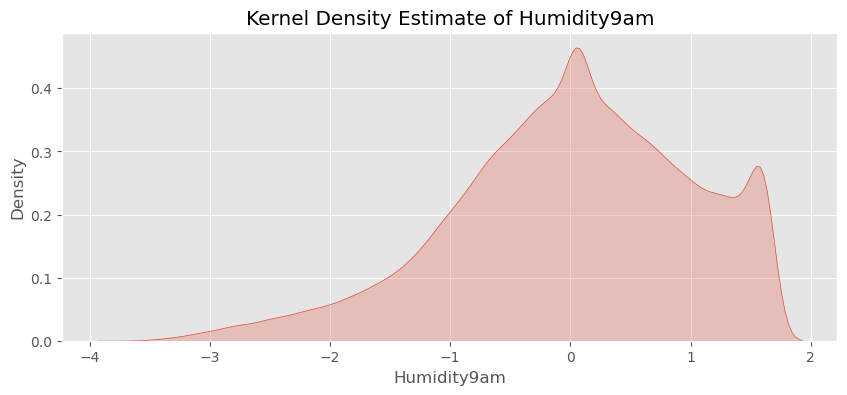

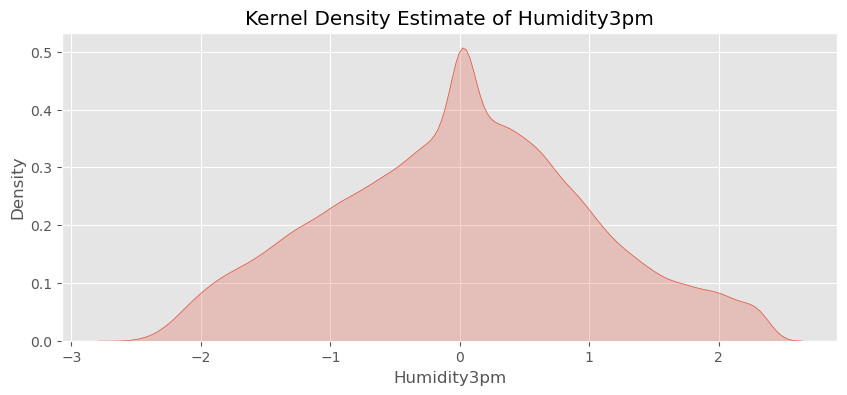

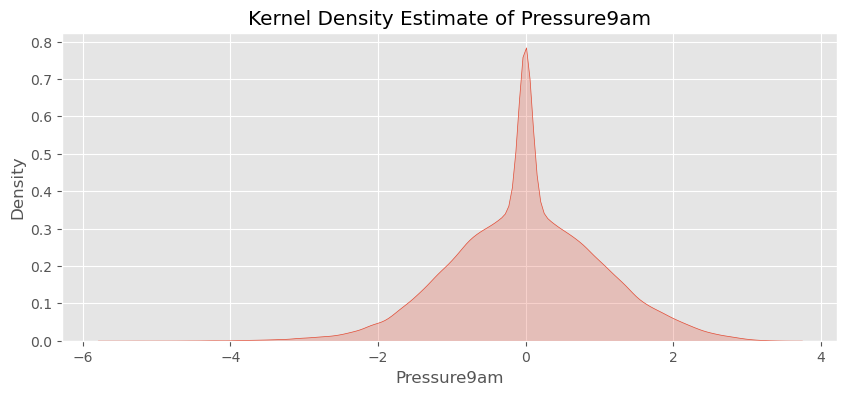

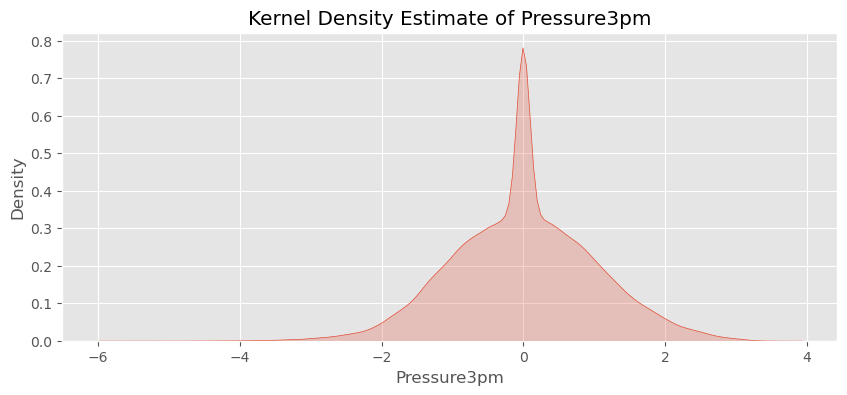

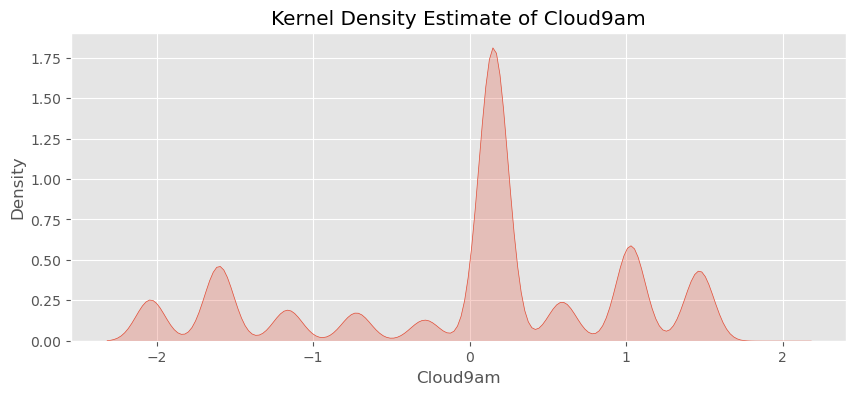

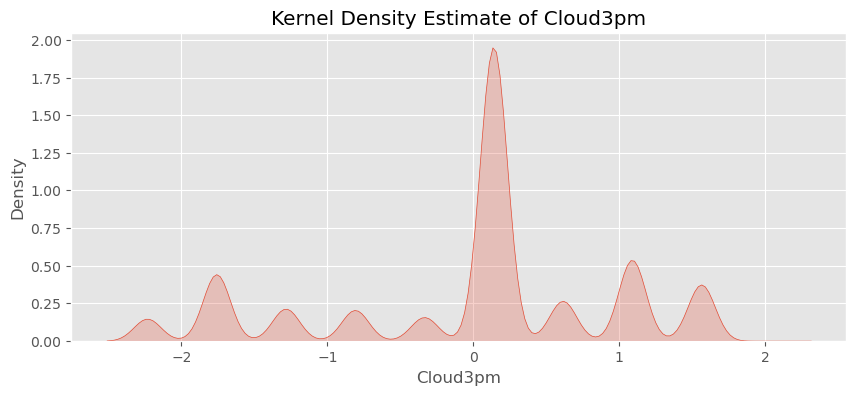

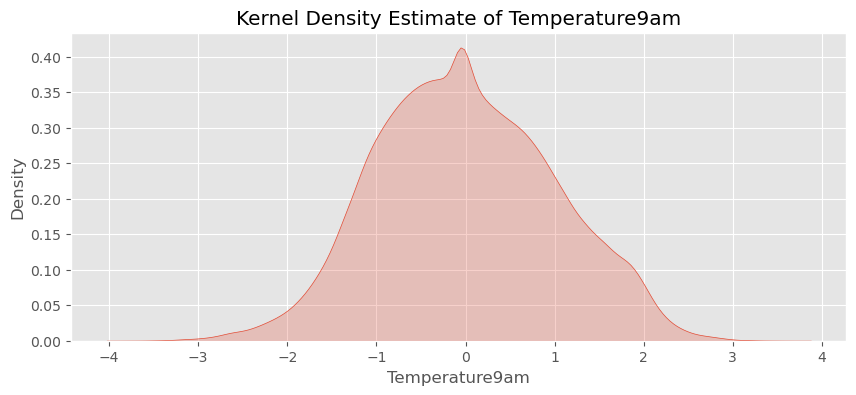

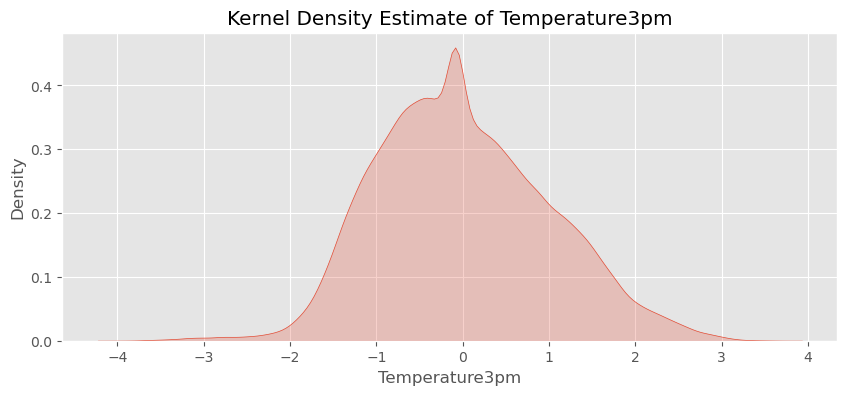

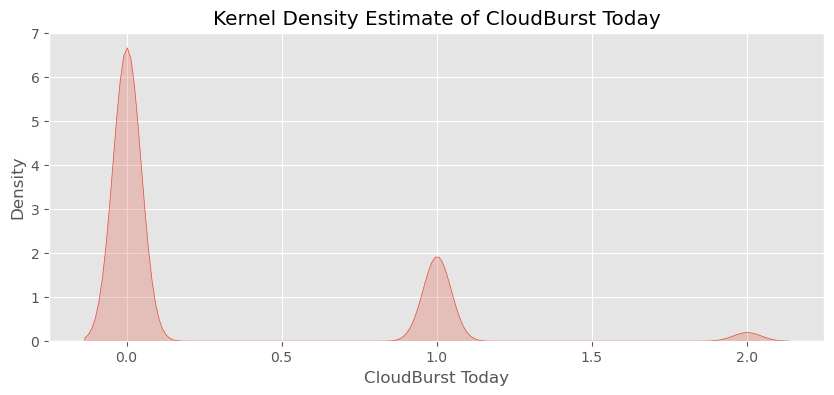

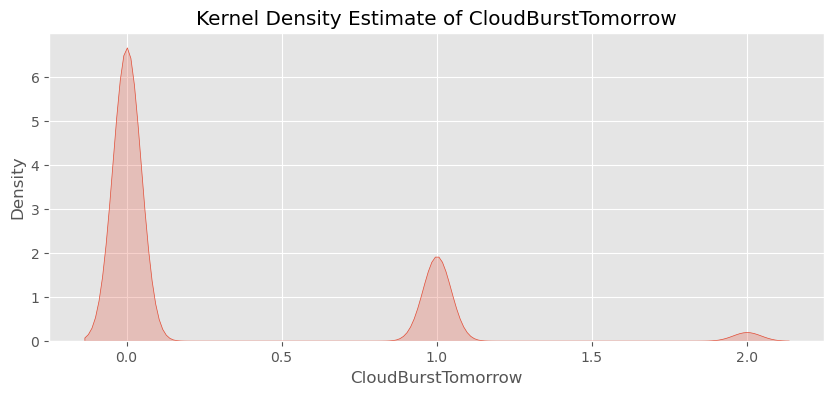

In [11]:
for feature in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(df[feature], fill=True)
    plt.title(f'Kernel Density Estimate of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

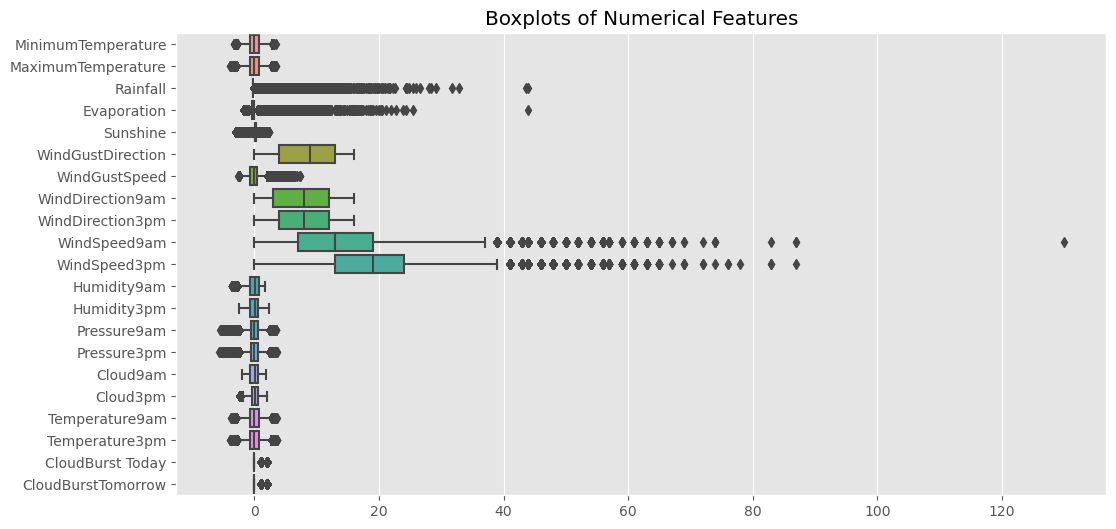

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient='h')
plt.title('Boxplots of Numerical Features')
plt.show()

In [13]:
# Feature Engineering
location_columns = [col for col in df.columns if 'Location_' in col]
features = numerical_features + location_columns

In [14]:
# Model Training and Evaluation
X = df[features]
y = df['CloudBurstTomorrow']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Model Evaluation
y_pred = model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

"""
[[TN1, FP1, FN1],
 [FN2, TP2, FP2],
 [FP3, FN3, TP3]]
Class 0 (No Cloudburst):
True Negatives (TN): 20993
False Positives (FP): 1012 (Predicted cloudburst, but actually no cloudburst)
False Negatives (FN): 7 (Predicted no cloudburst, but actually cloudburst)
Class 1 (Cloudburst):

False Negatives (FN): 3232 (Predicted no cloudburst, but actually cloudburst)
True Positives (TP): 3184 (Correctly predicted cloudburst)
False Positives (FP): 4 (Predicted cloudburst, but actually no cloudburst)
Class 2 (Uncertain or Other):

False Negatives (FN): 419 (Predicted no cloudburst, but actually uncertain or other)
False Positives (FP): 73 (Predicted uncertain or other, but actually no cloudburst)
True Positives (TP): 168 (Correctly predicted uncertain or other)
"""

Accuracy: 0.8368279939502269
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     22012
           1       0.75      0.50      0.60      6420
           2       0.94      0.25      0.40       660

    accuracy                           0.84     29092
   macro avg       0.85      0.57      0.63     29092
weighted avg       0.83      0.84      0.82     29092

Confusion Matrix:
 [[20993  1012     7]
 [ 3232  3184     4]
 [  419    73   168]]


'\n[[TN1, FP1, FN1],\n [FN2, TP2, FP2],\n [FP3, FN3, TP3]]\nClass 0 (No Cloudburst):\nTrue Negatives (TN): 20993\nFalse Positives (FP): 1012 (Predicted cloudburst, but actually no cloudburst)\nFalse Negatives (FN): 7 (Predicted no cloudburst, but actually cloudburst)\nClass 1 (Cloudburst):\n\nFalse Negatives (FN): 3232 (Predicted no cloudburst, but actually cloudburst)\nTrue Positives (TP): 3184 (Correctly predicted cloudburst)\nFalse Positives (FP): 4 (Predicted cloudburst, but actually no cloudburst)\nClass 2 (Uncertain or Other):\n\nFalse Negatives (FN): 419 (Predicted no cloudburst, but actually uncertain or other)\nFalse Positives (FP): 73 (Predicted uncertain or other, but actually no cloudburst)\nTrue Positives (TP): 168 (Correctly predicted uncertain or other)\n'

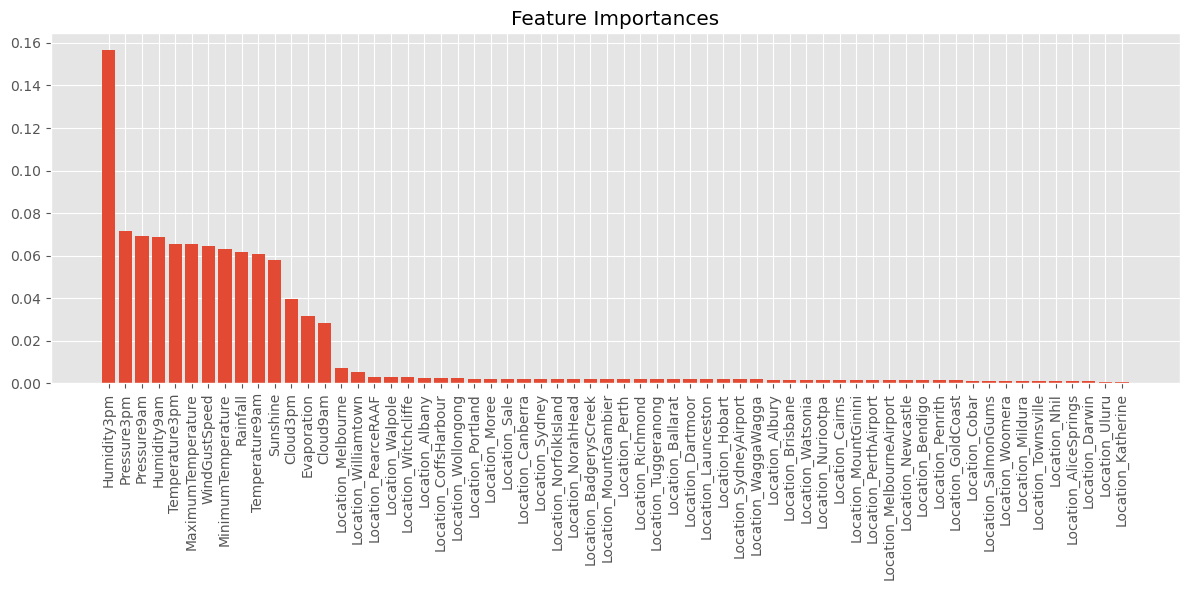

In [19]:
# Visualize Results
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

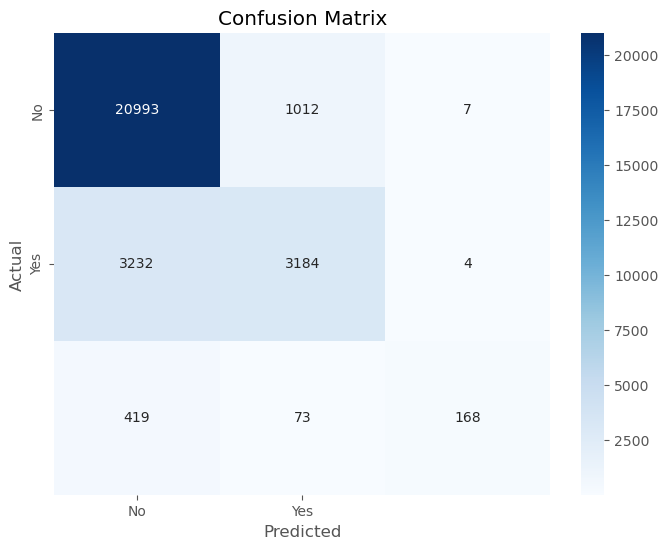

In [20]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

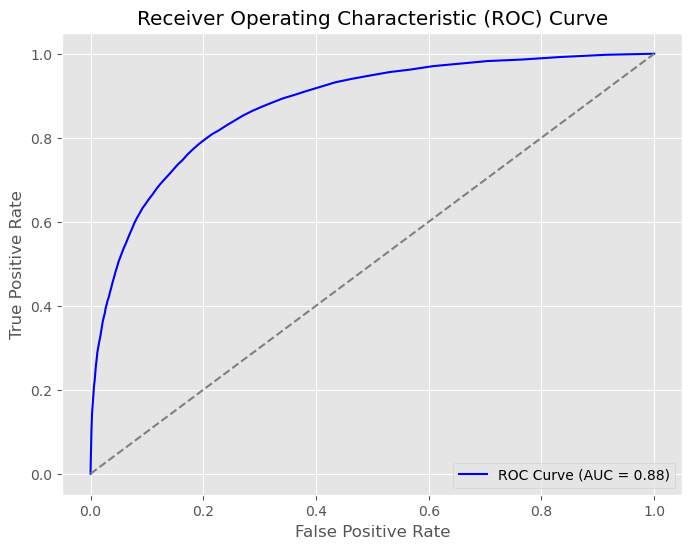

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

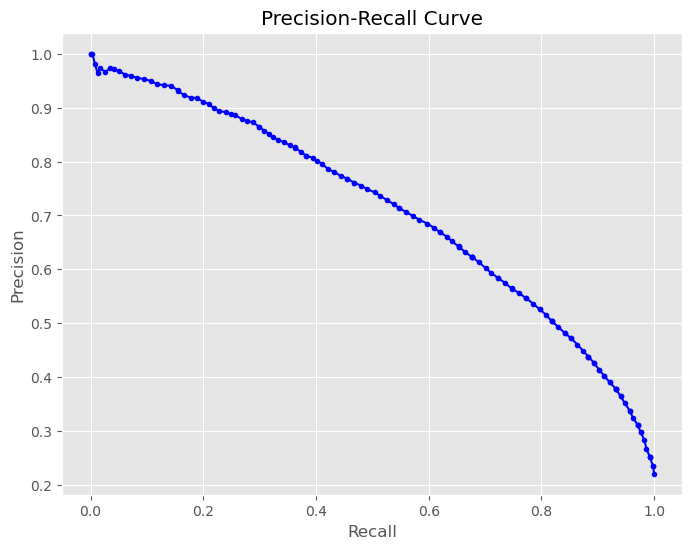

In [23]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob, pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

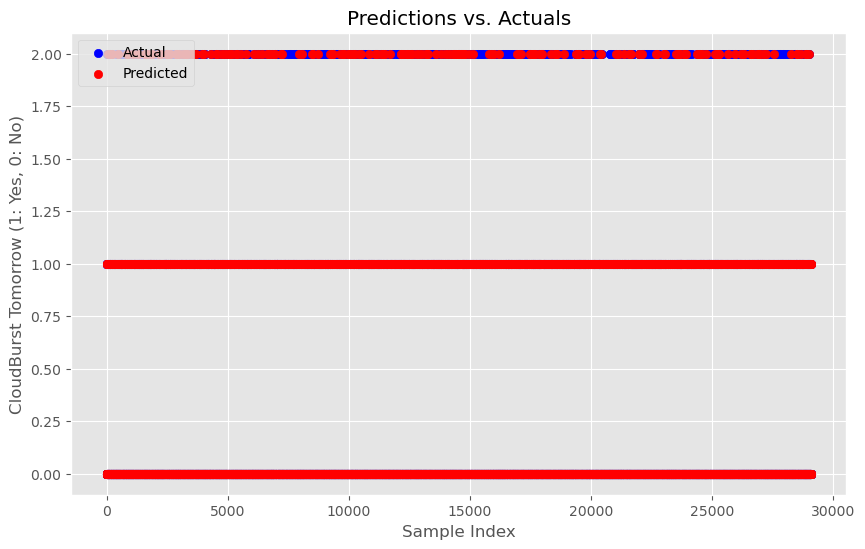

In [24]:
# Scatter Plot: Predictions vs. Actuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Predictions vs. Actuals')
plt.xlabel('Sample Index')
plt.ylabel('CloudBurst Tomorrow (1: Yes, 0: No)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import tkinter as tk
from tkinter import messagebox

# Load your dataset
file_path = 'cloudpredictionsystemproject.csv'  
df1 = pd.read_csv(file_path)

# Extract unique locations
unique_locations = df1['Location'].unique()

# Define the columns to consider for risk factors
risk_factor_columns = ['MinimumTemperature', 'Rainfall', 'WindGustSpeed', 'Cloud9am', 'Cloud3pm']

# Calculate overall mean values
overall_mean_values = df1[risk_factor_columns].mean()

# Initialize an empty dictionary to store risk multipliers
location_risk_multipliers = {}

# Calculate risk factors for each location
for location in df1['Location'].unique():
    location_data = df1[df1['Location'] == location]
    
    # Calculate the mean value of each risk factor for the location
    mean_values = location_data[risk_factor_columns].mean()
    
    # Calculate the risk multiplier (example: mean / overall mean)
    risk_multiplier = mean_values / overall_mean_values
    
    # Store the risk multipliers for the location
    location_risk_multipliers[location] = risk_multiplier.mean()  

class CloudBurstPredictorApp:
    def __init__(self, master):
        self.master = master
        master.title("Cloud Burst Prediction")

        # Input Data Frame
        self.input_frame = tk.LabelFrame(master, text="Input Data")
        self.input_frame.pack(pady=10)

        # Input Fields
        self.input_fields = {}
        labels = [
            "Minimum Temperature",
            "Rainfall",
            "Sunshine",
            "WindGustSpeed",
            "Humidity",
            "Cloud",
            "Location",
            "CloudBurst Today"
        ]
        
        for label in labels:
            row = tk.Frame(self.input_frame)
            row.pack(fill="x", padx=5, pady=5)

            tk.Label(row, text=label).pack(side="left")
            entry = tk.Entry(row)
            entry.pack(side="right", expand=True, fill="x")
            self.input_fields[label] = entry  

        # Predict Button
        self.predict_button = tk.Button(master, text="Predict", command=self.predict)
        self.predict_button.pack(pady=10)

    def predict(self):
        try:
            # Print input values
            input_values = {label: field.get() for label, field in self.input_fields.items()}
            print("Input Values:", input_values)

            # Get numerical input values
            min_temp = float(self.input_fields["Minimum Temperature"].get())
            rainfall = float(self.input_fields["Rainfall"].get())
            wind_gust_speed = float(self.input_fields["WindGustSpeed"].get())
            cloud = float(self.input_fields["Cloud"].get())
            location = self.input_fields["Location"].get().strip()

            # Check if the location is in the dataset
            if location not in location_risk_multipliers:
                messagebox.showerror("Error", f"Location '{location}' not recognized. Please enter a valid location.")
                return

            # Get the risk multiplier for the location
            risk_multiplier = location_risk_multipliers[location]

            # Adjust prediction conditions based on the location risk multiplier
            adjusted_min_temp = min_temp * risk_multiplier
            adjusted_rainfall = rainfall * risk_multiplier
            adjusted_wind_gust_speed = wind_gust_speed * risk_multiplier
            adjusted_cloud = cloud * risk_multiplier

            # Calculate a percentage-based prediction
            risk_score = (
                (adjusted_min_temp / 15) * 0.25 +
                (adjusted_rainfall / 2) * 0.25 +
                (adjusted_wind_gust_speed / 60) * 0.25 +
                (adjusted_cloud / 8) * 0.25
            )
            risk_percentage = risk_score * 100

            # Ensure the percentage is within a reasonable range (0% to 100%)
            risk_percentage = max(0, min(100, risk_percentage))

            # Display prediction in a message box
            prediction_message = f"Predicted Cloud Burst Risk: {risk_percentage:.2f}%"
            messagebox.showinfo("Prediction", prediction_message)

        except ValueError:
            messagebox.showerror("Error", "Please enter valid numerical values for input fields.")

root = tk.Tk()
app = CloudBurstPredictorApp(root)
root.mainloop()

Input Values: {'Minimum Temperature': '12', 'Rainfall': '0.8', 'Sunshine': '8', 'WindGustSpeed': '35', 'Humidity': '60', 'Cloud': '4', 'Location': 'Melbourne', 'CloudBurst Today': 'No'}
Input Values: {'Minimum Temperature': '12', 'Rainfall': '0.8', 'Sunshine': '8', 'WindGustSpeed': '35', 'Humidity': '60', 'Cloud': '4', 'Location': 'Melbourne', 'CloudBurst Today': 'No'}


In [28]:
"""
Minimum Temperature: 15.0
Rainfall: 2.5
Sunshine: 7.0
Wind Gust Speed: 60.0
Humidity: 70.0
Cloud: 6.0
Location: Sydney
CloudBurst Today: Yes
"""

'\nMinimum Temperature: 15.0\nRainfall: 2.5\nSunshine: 7.0\nWind Gust Speed: 60.0\nHumidity: 70.0\nCloud: 6.0\nLocation: Sydney\nCloudBurst Today: Yes\n'

In [ ]:
"""
Minimum Temperature: 18.0
Rainfall: 1.0
Sunshine: 6.5
Wind Gust Speed: 25.0
Humidity: 50.0
Cloud: 3.5
Location: Brisbane
CloudBurst Today: No
"""

In [ ]:
"""
Minimum Temperature: 12.0
Rainfall: 0.8
Sunshine: 8.0
Wind Gust Speed: 35.0
Humidity: 60.0
Cloud: 4.0
Location: Melbourne
CloudBurst Today: No
"""